<a href="https://www.kaggle.com/code/hikmatullahmohammadi/ps-s3-ep3-modeling-eda?scriptVersionId=117039094" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='0'></a>
# Playground Series - Season 3, Episode 3 (+EDA)
This is a fictional data set created by IBM data scientists. **Our objective** is to build a ml model to predict the probability of an employee atrrition.

# Easy Navigation

- [1- Data Exploration](#1)
- [2- Explanatory Data Analysis (EDA)](#2)
    - [2.0- Get the data ready for EDA](#2-0)
    - [2.1- Categorical Features](#2-1)
        - [2.1.1- Categorical features Counts/Distributions](#2-1-1)
        - [2.1.2- Tabular Relationship](#2-1-2)
        - [2.1.3- Visualization of Tabular Frequency of Features Vs Attrition](#2-1-3)
    - [2.2- Numeric Features](#2-2)
- [3- Feature Engineering](#3)
- [4- Modeling](#4)
    - [4.1- Model Construction](#4-1)
    - [4.2- Model Utilization & Submission](#4-2)

In [1]:
# import required libraies/dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

<a id='1'></a>
# 1- Data Exploration

In [2]:
# load datasets
df_train = pd.read_csv('/kaggle/input/playground-series-s3e3/train.csv', index_col=0)
df_test = pd.read_csv('/kaggle/input/playground-series-s3e3/test.csv', index_col=0)

df_orig = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv', index_col=0)
df_orig.drop('EmployeeNumber', axis=1, inplace=True)
df_orig['Attrition'] = df_orig['Attrition'].map({
    'Yes': 1,
    'No': 0
})

In [3]:
df_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
id,,,,,,,,,,,,,,,,,,,,,
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,80,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,80,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,80,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,80,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,80,0,31,0,3,31,14,4,10,1


In [4]:
print(f'The training set contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.')

The training set contains 1677 rows and 34 columns.


We will combine the training set with the original dataset here. <br>

In [5]:
df_train = pd.concat([df_train, df_orig])
df_train.shape

(3147, 34)

In [6]:
# Combine the training and the test sets to do some preprocessing.
df_both = pd.concat([df_train, df_test])

---

<a id='2'></a>
# 2- Explanatory Data Analysis (EDA)

**In this section, we will first go through all features one by one, and then we will see the relationships among features themselves and the target variable**

Before doing anything, let's decode the categorical features form numbers to its original values. We need it for Explanatory Data Analysis

<a id='2-0'></a>
## 2.0- Get the data ready for EDA

In [7]:
# decode the categorical features form numbers to its original values

# Education
df_both['Education'] = df_both['Education'].map({
    0: 'Below College',
    1: 'College',
    2: 'Bachelor',
    3: 'Master',
    4: 'Doctor'
})

# EnvironmentSatisfaction
df_both['EnvironmentSatisfaction'] = df_both['EnvironmentSatisfaction'].map({
    0: 'Low',
    1: 'Medium',
    2: 'High',
    3: 'Very High'
})

# JobInvolvement
df_both['JobInvolvement'] = df_both['JobInvolvement'].map({
    0: 'Low',
    1: 'Medium',
    2: 'High',
    3: 'Very High'
})

# JobSatisfaction
df_both['JobSatisfaction'] = df_both['JobSatisfaction'].map({
    0: 'Low',
    1: 'Medium',
    2: 'High',
    3: 'Very High'
})

# PerformanceRating
df_both['PerformanceRating'] = df_both['PerformanceRating'].map({
    0: 'Low',
    1: 'Good',
    2: 'Excellent',
    3: 'Outstanding'
})

# RelationshipSatisfaction
df_both['RelationshipSatisfaction'] = df_both['RelationshipSatisfaction'].map({
    0: 'Low',
    1: 'Medium',
    2: 'High',
    3: 'Very High'
})

# WorkLifeBalance
df_both['WorkLifeBalance'] = df_both['WorkLifeBalance'].map({
    0: 'Bad',
    1: 'Good',
    2: 'Better',
    3: 'Best'
})

In [8]:
df_both.index = index=np.arange(df_both.shape[0])

In [9]:
# fill missing values
df_both.iloc[:, :-1] = df_both.iloc[:, :-1].apply(lambda x: x.fillna(x.median()) if x.dtype=='int' or x.dtype=='float' else x.fillna(x.mode()[0]))

In [10]:
# re-assign df_train and df_test to reflect the changes we made in this cell.
df_train = df_both.iloc[:df_train.shape[0]]
df_test = df_both.iloc[df_train.shape[0]:].drop('Attrition', axis=1)

In [11]:
# extract categorical and numerical features
cate_features = [
    'BusinessTravel', 'Department', 'Education', 'EducationField', 'PerformanceRating', 'StockOptionLevel', 'TrainingTimesLastYear',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'JobLevel',
    'Over18', 'EmployeeCount','OverTime', 'RelationshipSatisfaction', 'StandardHours', 'WorkLifeBalance', 'Attrition'
]
numeric_features = list(set(df_train.columns)  - set(cate_features))

In [12]:
## utils/functions

# funtion to draw a pie plot regarding a features counts
def draw_count_pie(df, feature):
    explode = [0]*df[feature].value_counts().shape[0]
    explode[0] = 0.1
    plt.pie(
        x = df[feature].value_counts(),
        labels=df[feature].value_counts().index,
        autopct='%1.1f%%',
        explode=explode,
        shadow=True,
        startangle=0
    )
    plt.title(f'{feature} Counts', fontdict={'fontsize': 18})
    
# draw a countplot of a categorical variable along with how it effects the target variable which is 'Attrition'
def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.countplot(df[feature], hue=df['Attrition'])
    ax.set_title(f'{feature} counts vs Attrition', fontdict={'fontsize': 18})

# display tabular relationship between a numeric feature and Attrition
def display_tabular_relationship_cate_target(df, feature):
    display(pd.crosstab(
        index=df['Attrition'],
        columns=df[feature],
        normalize='columns'
    ))
    
# draw distribution plot for a numeric feature
def draw_numeric_dist(df, feature):
    sns.kdeplot(df[feature]) 
    ax = sns.distplot(df[feature])
    ax.set_title(f'{feature} Distribution', fontdict={'fontsize': 18})

# draw boxen plot for a numeric feature vs Attrition
def draw_numeric_target_boxen(df, feature):
    ax = sns.boxenplot(data=df, x='Attrition', y=feature)
    ax.set_title(f'{feature} VS Attrition', fontdict={'fontsize': 18})


<a id='2-1'></a>
## 2.1- Categorical Features

<a id='2-1-1'></a>
### 2.1.1- Categorical features Counts/Distributions

**NOTE:**<br>
In this section we will visualize how categorical features are distributed. <br>
I used Pie charts so as to help readers to conveniently identify the followings about categorical features:
- How many & which values a particular feature contains
- the most frequent value (a.k.a Mode)
- the least frequent value
- the percentage of occurance of each value


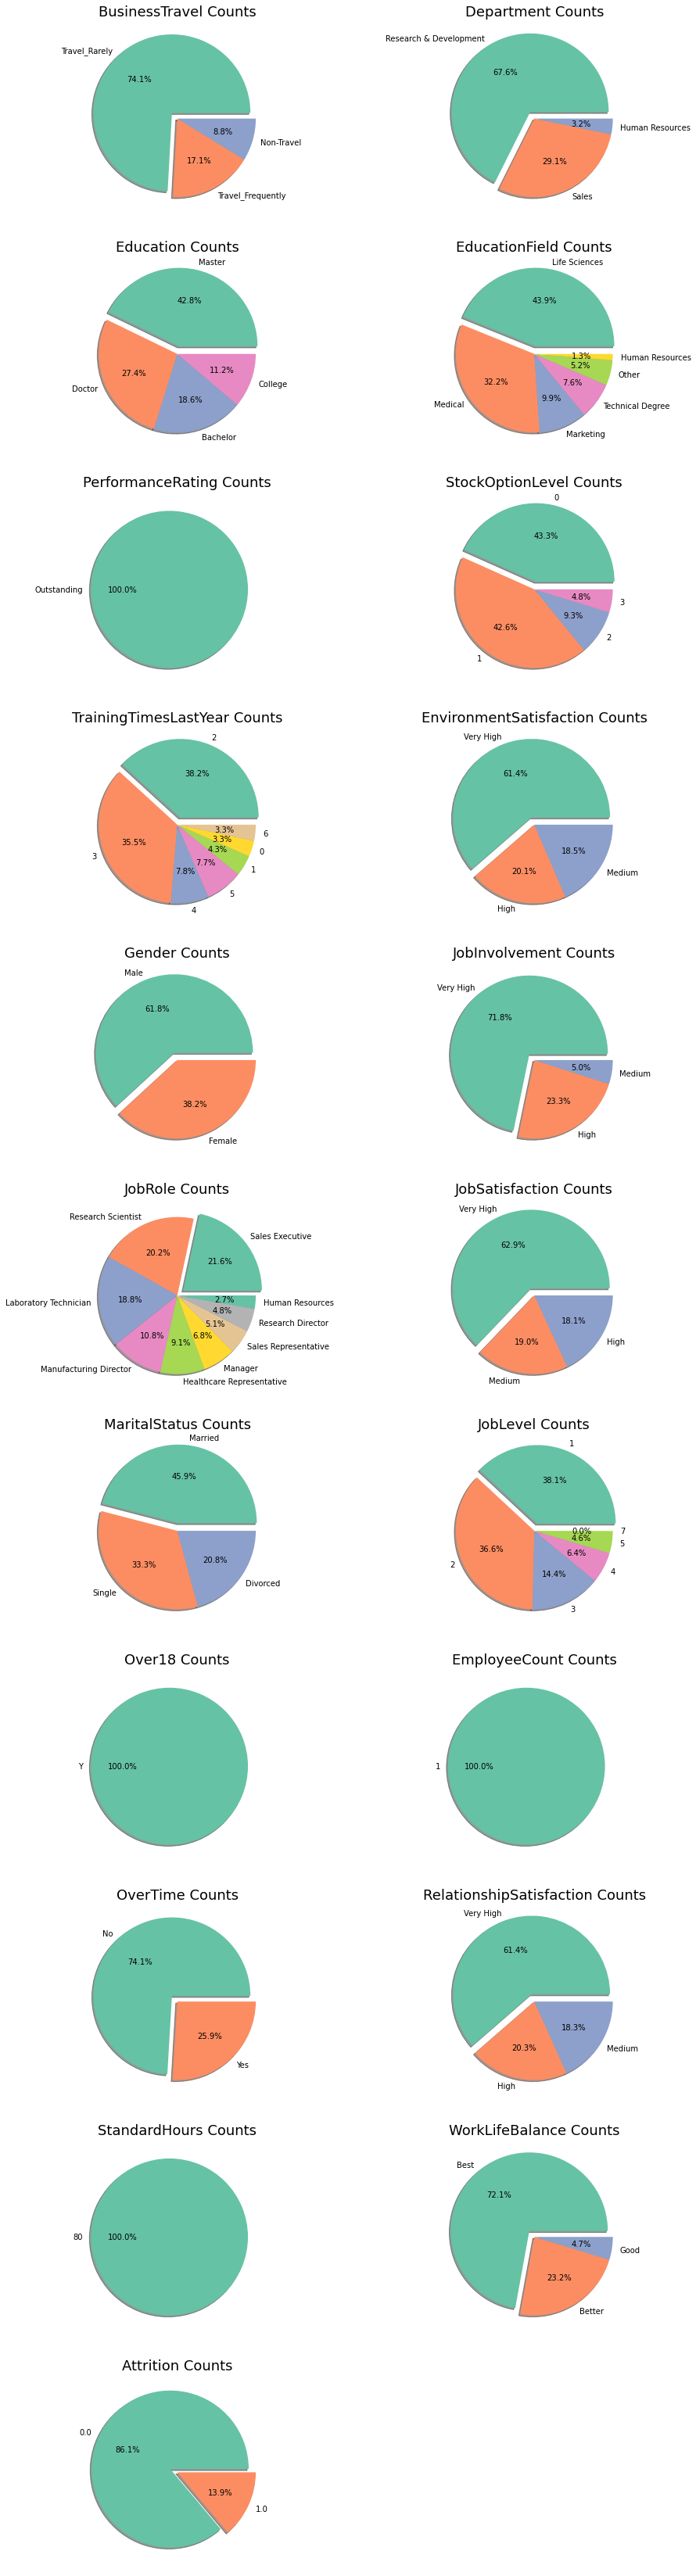

In [13]:
# draw the pie plots for all categorical features counts
plt.figure(figsize=(15, 60))
sns.set_palette('Set2')

for i, feature in enumerate(cate_features):
    plt.subplot(len(cate_features)//2+1, 2, i+1)
    draw_count_pie(df_train, feature)
    
plt.show()    

Above-displayed figures are quite self-explaining. Hence, I leave it to you to look at them and grasp how particular features are distributed.<br>
We will use these plots in feature engineering section as well.

---

<a id='2-1-2'></a>
### 2.1.2- Cross Tabulation Relationships

**NOTE:**<br>
Using cross tabular relationships, we can easily identify how particular features have an impact on each other. In this case, we use it to determine how accurance of a particular value of a feature have effected the target variable.<br>
The columns in each chart bellow represent the values of a particular feature. The sum of each column is equal to one. Furthermore, Each chart bellow contains two rows. And the intersection of each column and the first row represents the percentage of occurance of the corresponding column which has NOT resulted in an attrition; but the intersection of each column and the second row represents the percentage of occurance of the corresponding column which has resulted in an attrition. 

In [14]:
# display the cross tabular relationships of categorical features and Attrition
print('           *************START***********             \n\n\n')
for i, feature in enumerate(cate_features):
    print(f'{i+1}: {feature} and Attrition')
    display_tabular_relationship_cate_target(df_train, feature)
    print(' '*10+'*'*10+'\n\n')

           *************START***********             



1: BusinessTravel and Attrition


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0.0,0.938406,0.776952,0.87141
1.0,0.061594,0.223048,0.12859


          **********


2: Department and Attrition


Department,Human Resources,Research & Development,Sales
Attrition,,,
0.0,0.813725,0.878289,0.826609
1.0,0.186275,0.121711,0.173391


          **********


3: Education and Attrition


Education,Bachelor,College,Doctor,Master
Attrition,,,,
0.0,0.866894,0.815341,0.888631,0.853007
1.0,0.133106,0.184659,0.111369,0.146993


          **********


4: EducationField and Attrition


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
0.0,0.75,0.871832,0.803859,0.875617,0.896341,0.806723
1.0,0.25,0.128168,0.196141,0.124383,0.103659,0.193277


          **********


5: PerformanceRating and Attrition


PerformanceRating,Outstanding
Attrition,
0.0,0.861138
1.0,0.138862


          **********


6: StockOptionLevel and Attrition


StockOptionLevel,0,1,2,3
Attrition,,,,
0.0,0.774762,0.931394,0.938567,0.866667
1.0,0.225238,0.068606,0.061433,0.133333


          **********


7: TrainingTimesLastYear and Attrition


TrainingTimesLastYear,0,1,2,3,4,5,6
Attrition,,,,,,,
0.0,0.740385,0.925373,0.851913,0.873769,0.812245,0.892116,0.913462
1.0,0.259615,0.074627,0.148087,0.126231,0.187755,0.107884,0.086538


          **********


8: EnvironmentSatisfaction and Attrition


EnvironmentSatisfaction,High,Medium,Very High
Attrition,,,
0.0,0.868671,0.782161,0.882505
1.0,0.131329,0.217839,0.117495


          **********


9: Gender and Attrition


Gender,Female,Male
Attrition,,
0.0,0.875937,0.852004
1.0,0.124063,0.147996


          **********


10: JobInvolvement and Attrition


JobInvolvement,High,Medium,Very High
Attrition,,,
0.0,0.830832,0.660256,0.884854
1.0,0.169168,0.339744,0.115146


          **********


11: JobRole and Attrition


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
0.0,0.933566,0.77907,0.79258,0.934272,0.956012,0.97351,0.860063,0.860499,0.63125
1.0,0.066434,0.22093,0.20742,0.065728,0.043988,0.02649,0.139937,0.139501,0.36875


          **********


12: JobSatisfaction and Attrition


JobSatisfaction,High,Medium,Very High
Attrition,,,
0.0,0.859649,0.811352,0.876643
1.0,0.140351,0.188648,0.123357


          **********


13: MaritalStatus and Attrition


MaritalStatus,Divorced,Married,Single
Attrition,,,
0.0,0.925076,0.893499,0.776504
1.0,0.074924,0.106501,0.223496


          **********


14: JobLevel and Attrition


JobLevel,1,2,3,4,5,7
Attrition,,,,,,
0.0,0.774624,0.918332,0.883002,0.95,0.930556,1.0
1.0,0.225376,0.081668,0.116998,0.05,0.069444,0.0


          **********


15: Over18 and Attrition


Over18,Y
Attrition,
0.0,0.861138
1.0,0.138862


          **********


16: EmployeeCount and Attrition


EmployeeCount,1
Attrition,
0.0,0.861138
1.0,0.138862


          **********


17: OverTime and Attrition


OverTime,No,Yes
Attrition,,
0.0,0.904762,0.73652
1.0,0.095238,0.26348


          **********


18: RelationshipSatisfaction and Attrition


RelationshipSatisfaction,High,Medium,Very High
Attrition,,,
0.0,0.870313,0.803478,0.875259
1.0,0.129688,0.196522,0.124741


          **********


19: StandardHours and Attrition


StandardHours,80
Attrition,
0.0,0.861138
1.0,0.138862


          **********


20: WorkLifeBalance and Attrition


WorkLifeBalance,Best,Better,Good
Attrition,,,
0.0,0.870485,0.862826,0.709459
1.0,0.129515,0.137174,0.290541


          **********


21: Attrition and Attrition


Attrition,0.0,1.0
Attrition,,
0.0,1.0,0.0
1.0,0.0,1.0


          **********




<a id='2-1-3'></a>
### 2.1.3- Visualization of Tabular Frequency of Features Vs Attrition

**NOTE:**<br>
In this section we visualize how much each categorical feature has an impact on the target variable (Attrition).

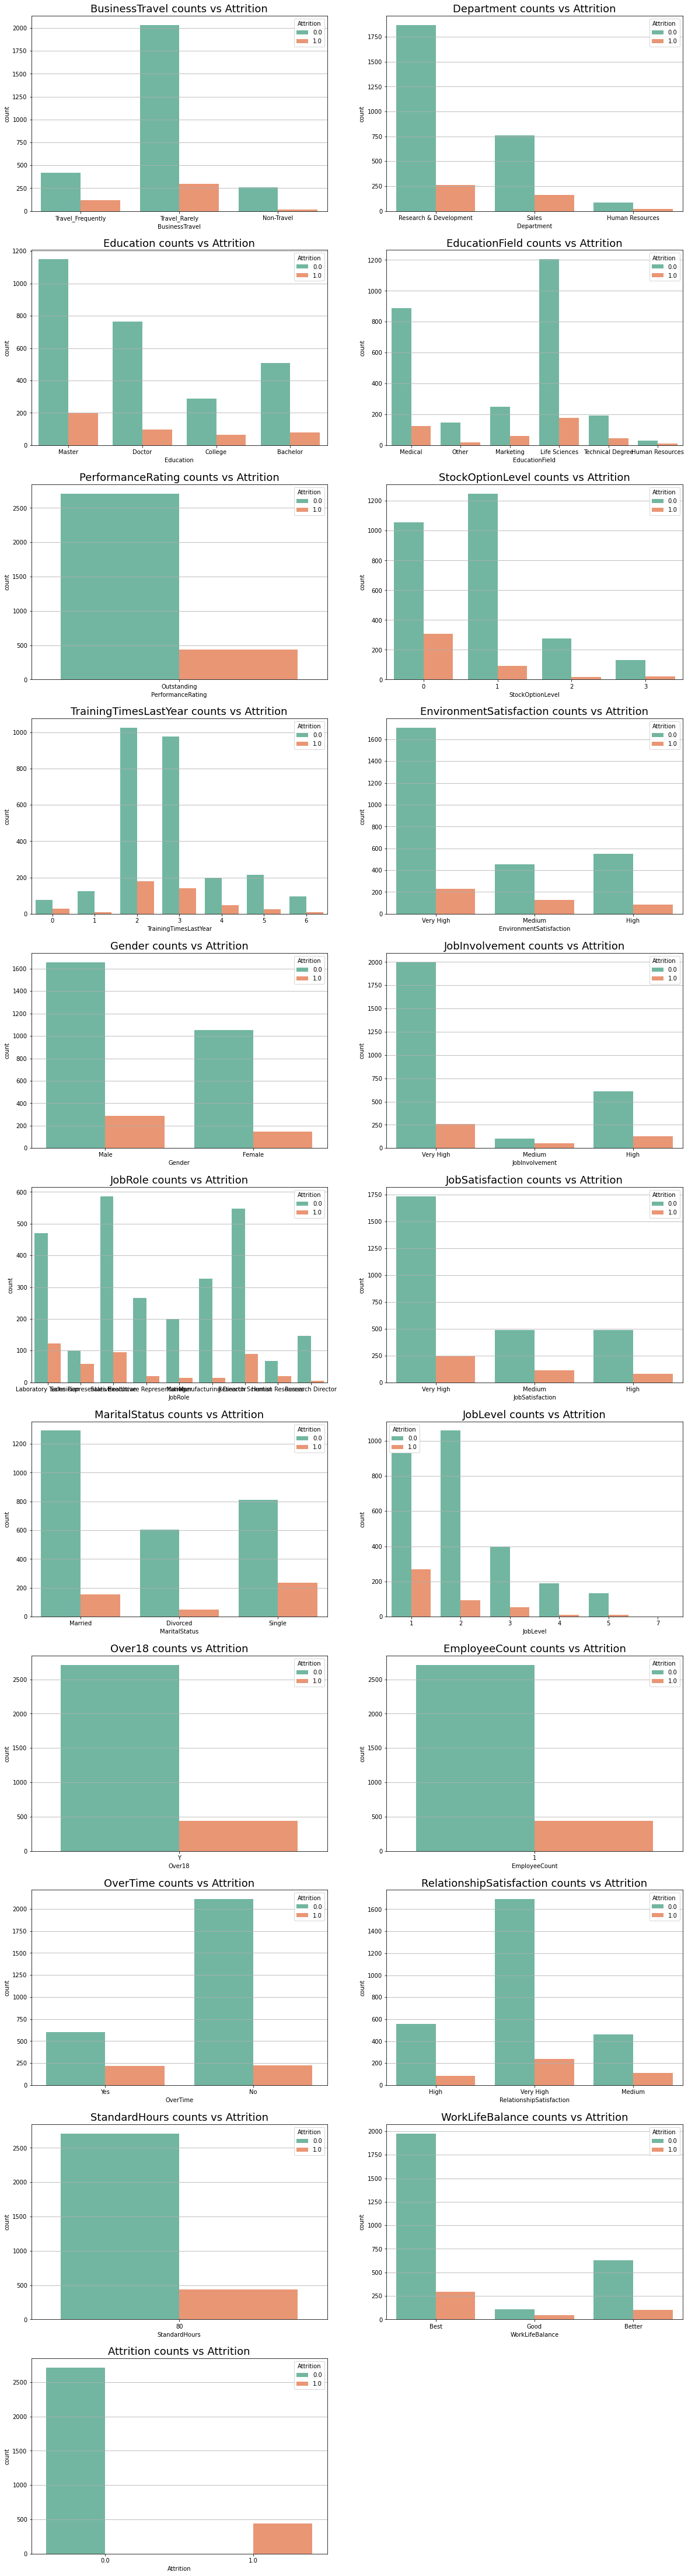

In [15]:
# draw the counts/distributions of categorical features vs the target variable
plt.figure(figsize=(20, 80))
sns.set_palette('Set2')

for i, feature in enumerate(cate_features):
    plt.subplot(len(cate_features)//2+1, 2, i+1)
    draw_cate_vs_target(df_train, feature)
    
plt.show()    

Above-displayed figures are quite self-explaining. Hence, I leave it to you to look at them and grasp how the distribution of particular features have an impact on the target variable.<br>
We will use these plots in feature engineering section as well.

---

<a id='2-2'></a>
## 2.2- Numeric features

**NOTE:**<br>
In this section we will visualize how each numeric feature is distributed, and how the distribution of each particular feature has an impact on the raget variable.

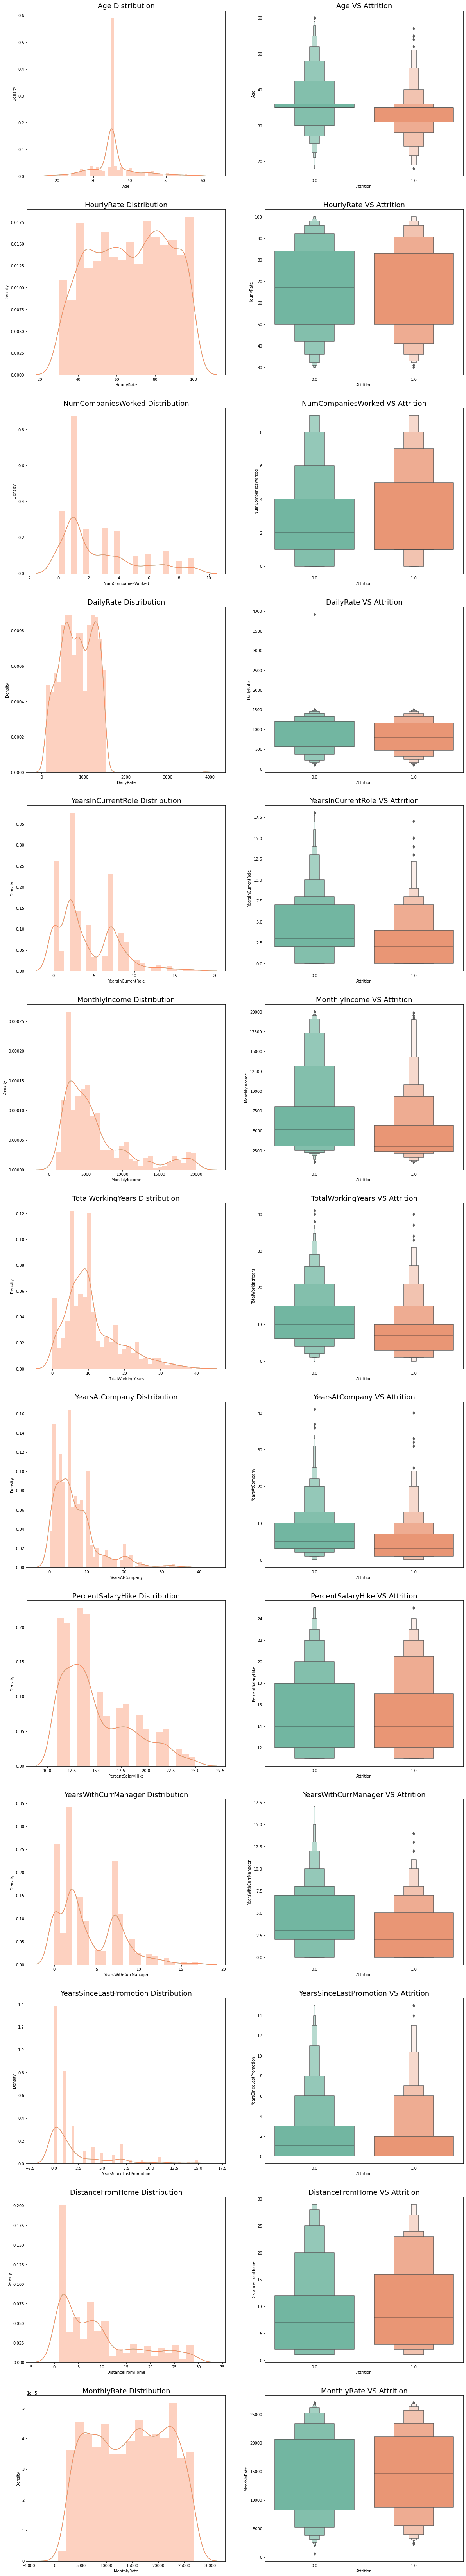

In [16]:
# draw some plots for all numeric features [+ vs Attrition]
plt.figure(figsize=(20, 120))
sns.set_palette('Set2')

i = 1
for feature in numeric_features:
    # dist
    plt.subplot(len(numeric_features), 2, i)
    draw_numeric_dist(df_train, feature)
    # box
    plt.subplot(len(numeric_features), 2, i+1)
    draw_numeric_target_boxen(df_train, feature)
    i += 2
    
plt.show()    

Above-displayed figures are quite self-explaining. Hence, I leave it to you to look at them and grasp how particular features are distributed, and how they have an impact on the target variable.<br>
We will use these plots in feature engineering section as well.

**Note: there is only one observation whose DailyRate value is above 1500; we'll replace it by its mean.**

In [17]:
df_both.replace(df_both[df_both['DailyRate']>1500].index, df_both['DailyRate'].mean(), inplace=True)

---

<a id='3'></a>
# 3- Feature Engineering

What is **Feature Engineering?**<br>
> Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. (https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)

In this section we will cover the followings:
- Remove some features which has the minimum or no effect on the target variable
- Create some new features out of existing features.

<a id='3-1'></a>
### 3.1- Removing insignificant features

In this section, we will delete features that contain only one value. Note: to determine such features, we will use [these Pie plots](#2-1-1).

In [18]:
# remove Over18, EmployeeCount, Standardhours: these are from the first category mentioned above.
df_both.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)

<a id='3-2'></a>
### 3.2- Creating new features

We will create a new feature, **PositiveAttritionFactors**. We will consider the criteria bellow to create the new feature.

**Note:**<br >
How I have come up with the criteria bellow: <br >
Look at this example:<br>
*Over 22% of observations with a StockOptionLevel of 0 has an Attrition of 1, wich is relatively high compared to other values of it, e.g. 1&2: 0.06% and 3: 0.13%; thus, I chose it as one point for PositiveAttritionFactors.*<br>

I examined all features one by one using [these Cross Tabulations](#2-1-2).

**PositiveAttritionFactors:**<br>
- 'StockOptionLevel': 0,
- 'TrainingTimesLastYear': 0,
- 'JobInvolvement': 'Medium',
- 'JobRole': 'Sales Representative',
- 'MaritalStatus': 'Single',
- 'OverTime': 'Yes',
- 'WorkLifeBalance': 'Good'

In [19]:
# create RiskFactorsPositive
df_both["PositiveAttritionFactors"] = df_both[[
        'StockOptionLevel',
        'TrainingTimesLastYear',
        'JobInvolvement',
        'JobRole',
        'MaritalStatus',
        'OverTime',
        'WorkLifeBalance'
    ]].apply(
        lambda x: \
        0 + (1 if x['StockOptionLevel'] == 0 else 0) + \
        (1 if x['TrainingTimesLastYear'] == 0 else 0) + \
        (1 if x['JobInvolvement'] == 'Medium' else 0) + \
        (1 if x['JobRole'] == 'Sales Representative' else 0) + \
        (1 if x['MaritalStatus'] == 'Single' else 0) +
        (1 if x['OverTime'] == 'Yes' else 0) + \
        (1 if x['WorkLifeBalance'] == 'Good' else 0),
        axis=1
    )

<a id='4'></a>
# 4- Modeling

<a id='4-1'></a>
## 4.1- Model Construction

In [20]:
# encode the categorical features into numbers

# Education
df_both['Education'] = df_both['Education'].map({
    'Below College': 0,
    'College': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctor': 4
}).astype('int')

# EnvironmentSatisfaction
df_both['EnvironmentSatisfaction'] = df_both['EnvironmentSatisfaction'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High': 3
}).astype('int')

# JobInvolvement
df_both['JobInvolvement'] = df_both['JobInvolvement'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High': 3
}).astype('int')

# JobSatisfaction
df_both['JobSatisfaction'] = df_both['JobSatisfaction'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High': 3
}).astype('int')

# PerformanceRating
df_both['PerformanceRating'] = df_both['PerformanceRating'].map({
    'Low': 0,
    'Good': 1,
    'Excellent': 2,
    'Outstanding': 3
}).astype('int')

# RelationshipSatisfaction
df_both['RelationshipSatisfaction'] = df_both['RelationshipSatisfaction'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High': 3
}).astype('int')

# WorkLifeBalance
df_both['WorkLifeBalance'] = df_both['WorkLifeBalance'].map({
    'Bad': 0,
    'Good': 1,
    'Better': 2,
    'Best': 3
}).astype('int')

# BusinessTravel
df_both['BusinessTravel'] = df_both['BusinessTravel'].map({
    'Travel_Frequently': 0,
    'Travel_Rarely': 1,
    'Non-Travel': 2
}).astype('int')

# Department
df_both['Department'] = df_both['Department'].map({
    'Research & Development': 0,
    'Sales': 1,
    'Human Resources': 2
}).astype('int')

# EducationField
df_both['EducationField'] = df_both['EducationField'].map({
    'Medical': 0,
    'Other': 1,
    'Marketing': 2,
    'Life Sciences': 3,
    'Technical Degree': 4,
    'Human Resources': 5,
}).astype('int')

# Gender
df_both['Gender'] = df_both['Gender'].map({
    'Male': 0,
    'Female': 1
}).astype('int')

# JobRole
df_both['JobRole'] = df_both['JobRole'].map({
    'Laboratory Technician': 0,
    'Sales Representative': 1,
    'Sales Executive': 2,
    'Healthcare Representative': 3,
    'Manager': 4,
    'Manufacturing Director': 5,
    'Research Scientist': 6,
    'Human Resources': 7,
    'Research Director': 8
}).astype('int')

# MaritalStatus
df_both['MaritalStatus'] = df_both['MaritalStatus'].map({
    'Married': 0,
    'Divorced': 1,
    'Single': 2
}).astype('int')

# OverTime
df_both['OverTime'] = df_both['OverTime'].map({
    'No': 0,
    'Yes': 1
}).astype('int')

In [21]:
# re-assign df_train and df_test to reflect the changes we have made.
df_train = df_both.iloc[:df_train.shape[0]]
df_test = df_both.iloc[df_train.shape[0]:].drop('Attrition', axis=1)

In [22]:
# separatAgee the features from the target variable
X = df_train.drop('Attrition', axis=1)
y = df_train['Attrition'].astype('int')

In [23]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)

In [24]:
# training
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# models
ada_clf = AdaBoostClassifier()
lgbm_clf = LGBMClassifier()
# fits
ada_clf.fit(X_train, y_train)
lgbm_clf.fit(X_train, y_train)

LGBMClassifier()

In [25]:
from sklearn.metrics import confusion_matrix

y_pred_ada = ada_clf.predict(X_test)
y_pred_lgbm = lgbm_clf.predict(X_test)

print('Ada CM: ')
display(confusion_matrix(y_test, y_pred_ada))
print('LGBM CM: ')
display(confusion_matrix(y_test, y_pred_lgbm))

Ada CM: 


array([[261,   6],
       [ 27,  21]])

LGBM CM: 


array([[256,  11],
       [ 31,  17]])

<a id='4-2'></a>
## 4.2- Prediction & Submission

In [26]:
# predict on the test set
# classification
ada_preds = ada_clf.predict_proba(df_test)[:, 1]
lgbm_preds = lgbm_clf.predict_proba(df_test)[:, 1]

In [27]:
# blend the predictions
preds = (.6*ada_preds + .4*lgbm_preds)

In [28]:
# create a dataframe
submission = pd.DataFrame({
    'id': np.arange(1677, 1677+1119),
    'Attrition': preds
})
submission.head()

,id,Attrition
0,1677,0.315133
1,1678,0.296236
2,1679,0.291876
3,1680,0.290245
4,1681,0.560204


In [29]:
# write to a file
submission.to_csv('./submission.csv', index=False)
print('Done...')

Done...


# Thank you :)
By: [Hikmatullah Mohammadi](https://www.kaggle.com/hikmatullahmohammadi) <br>

[Go to top](#0)